In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from yardımcı.EDA import*
from yardımcı.DATA_PREP import*
from yardımcı.GORSEL import*

# DEĞİŞKEN AÇIKLAMASI

PassengerId: her yolcu için kimlik numarası
Survived: yolcu hayatta kaldı (1) ya da öldü (0) 
Pclass: yolcu sınıfı 
Name: isim 
Sex: yolcu cinsyeti 
Age: yolcu yaşı 
SibSp: kardeş / eş sayısı 
Parch: ebeveyn / çocuk sayısı 
Ticket: Bilet numarası 
Fare: Bilete harcanan para miktarı 
Cabin: Kabin Kategorisi 
Embarked: yolcunun bindiği liman (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329



kategorik değişkenlerde : Survived Sex ve Embarked var
numerik değişkenlerde : Age Fare SibSp Parch 


In [6]:
df.isnull().values.any()
#hiç null değer var mı diye sorgulattım

True

In [7]:
df.isnull().sum()
#toplam null değerleri yazdırdım

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
check_df(df, head=5)
#ilk 5 satırın kontrolünü yaptırdım

##################### Shape #####################
(891, 12)
##################### Types #####################
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##################### Head #####################
   PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male 22.000      1      0         A/5 21171  7.250   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0          PC 17599 71.283   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female 

In [9]:
grab_col_names(df, cat_th=10, car_th=20)
#kaçar tane numerik ve kategorik değerlerimizin olduğunu sorgulattım
#kategorik değişkenlerde : Survived Sex ve Embarked var
#numerik değişkenlerde : Age Fare SibSp Parch 


Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


(['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch'],
 ['PassengerId', 'Age', 'Fare'],
 ['Name', 'Ticket', 'Cabin'])

In [10]:
for i in df.columns:
    
    cat_summary(df,i, plot=False)
    print("-------------")
    


     PassengerId  Ratio
1              1  0.112
599            1  0.112
588            1  0.112
589            1  0.112
590            1  0.112
..           ...    ...
301            1  0.112
302            1  0.112
303            1  0.112
304            1  0.112
891            1  0.112

[891 rows x 2 columns]
##########################################
-------------
   Survived  Ratio
0       549 61.616
1       342 38.384
##########################################
-------------
   Pclass  Ratio
3     491 55.107
1     216 24.242
2     184 20.651
##########################################
-------------
                                          Name  Ratio
Braund, Mr. Owen Harris                      1  0.112
Boulos, Mr. Hanna                            1  0.112
Frolicher-Stehli, Mr. Maxmillian             1  0.112
Gilinski, Mr. Eliezer                        1  0.112
Murdlin, Mr. Joseph                          1  0.112
...                                        ...    ...
Kelly, Miss. A

In [11]:
cat_summary(df,"Survived", plot=False)

   Survived  Ratio
0       549 61.616
1       342 38.384
##########################################


In [12]:
cat_summary(df,"Pclass", plot=False)

   Pclass  Ratio
3     491 55.107
1     216 24.242
2     184 20.651
##########################################


In [13]:
cat_summary(df,"Sex", plot=False)
#kategorik değişken olan Sex için analiz yaptırdım 
#%64.759 erkek  %35.241 kadın var 


        Sex  Ratio
male    577 64.759
female  314 35.241
##########################################


In [14]:
cat_summary(df,"Embarked", plot=False)
#kategorik değişken olan Sex için analiz yaptırdım 
#S clasında %72.278 C clasında %18.855 Q clasında %8.642 kişi sehayat etmiştir

   Embarked  Ratio
S       644 72.278
C       168 18.855
Q        77  8.642
##########################################


In [15]:
for i in df.columns:
   
    num_summary(df,i, plot=False)
    
    print("-------------")


count   891.000
mean    446.000
std     257.354
min       1.000
5%       45.500
10%      90.000
20%     179.000
30%     268.000
40%     357.000
50%     446.000
60%     535.000
70%     624.000
80%     713.000
90%     802.000
95%     846.500
99%     882.100
max     891.000
Name: PassengerId, dtype: float64
-------------
count   891.000
mean      0.384
std       0.487
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%       0.000
60%       0.000
70%       1.000
80%       1.000
90%       1.000
95%       1.000
99%       1.000
max       1.000
Name: Survived, dtype: float64
-------------
count   891.000
mean      2.309
std       0.836
min       1.000
5%        1.000
10%       1.000
20%       1.000
30%       2.000
40%       2.000
50%       3.000
60%       3.000
70%       3.000
80%       3.000
90%       3.000
95%       3.000
99%       3.000
max       3.000
Name: Pclass, dtype: float64
-------------
count                         891
unique        

yukarıda for döngüsü ile tüm numerik değişkenler için analiz yaptırdım

In [16]:
num_summary(df, "Age", plot=False)

count   714.000
mean     29.699
std      14.526
min       0.420
5%        4.000
10%      14.000
20%      19.000
30%      22.000
40%      25.000
50%      28.000
60%      31.800
70%      36.000
80%      41.000
90%      50.000
95%      56.000
99%      65.870
max      80.000
Name: Age, dtype: float64


In [17]:
num_summary(df, "SibSp", plot=False)

count   891.000
mean      0.523
std       1.103
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%       0.000
60%       0.000
70%       1.000
80%       1.000
90%       1.000
95%       3.000
99%       5.000
max       8.000
Name: SibSp, dtype: float64


In [18]:
num_summary(df, "Parch", plot=False)

count   891.000
mean      0.382
std       0.806
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%       0.000
60%       0.000
70%       0.000
80%       1.000
90%       2.000
95%       2.000
99%       4.000
max       6.000
Name: Parch, dtype: float64


In [19]:
num_summary(df, "Fare", plot=False)

count   891.000
mean     32.204
std      49.693
min       0.000
5%        7.225
10%       7.550
20%       7.854
30%       8.050
40%      10.500
50%      14.454
60%      21.679
70%      27.000
80%      39.688
90%      77.958
95%     112.079
99%     249.006
max     512.329
Name: Fare, dtype: float64


In [20]:
target_summary_with_num(df,"Age", "Survived")


        Survived
Age             
0.420      1.000
0.670      1.000
0.750      1.000
0.830      1.000
0.920      1.000
...          ...
70.000     0.000
70.500     0.000
71.000     0.000
74.000     0.000
80.000     1.000

[88 rows x 1 columns]




Hedef değişkenim ile categorik değişken arasındaki ilişkiyi görmek için  target_summary_with_num fonksiyonunu kullandım 

In [21]:
target_summary_with_cat(df, "Survived", "Pclass")

        TARGET_MEAN
Pclass             
1             0.630
2             0.473
3             0.242




In [22]:
target_summary_with_cat(df, "Survived", "Age")

        TARGET_MEAN
Age                
0.420         1.000
0.670         1.000
0.750         1.000
0.830         1.000
0.920         1.000
...             ...
70.000        0.000
70.500        0.000
71.000        0.000
74.000        0.000
80.000        1.000

[88 rows x 1 columns]




In [23]:
target_summary_with_cat(df, "Survived", "Sex")

        TARGET_MEAN
Sex                
female        0.742
male          0.189




In [24]:
target_summary_with_cat(df, "Survived", "Embarked")

          TARGET_MEAN
Embarked             
C               0.554
Q               0.390
S               0.337




In [25]:
target_summary_with_num(df,"Survived", "SibSp")

          SibSp
Survived       
0         0.554
1         0.474




In [26]:
target_summary_with_num(df,"Survived", "Parch")

          Parch
Survived       
0         0.330
1         0.465




In [27]:
target_summary_with_num(df,"Survived", "Pclass")

          Pclass
Survived        
0          2.532
1          1.950




In [28]:
target_summary_with_num(df,"Survived", "Fare")

           Fare
Survived       
0        22.118
1        48.395




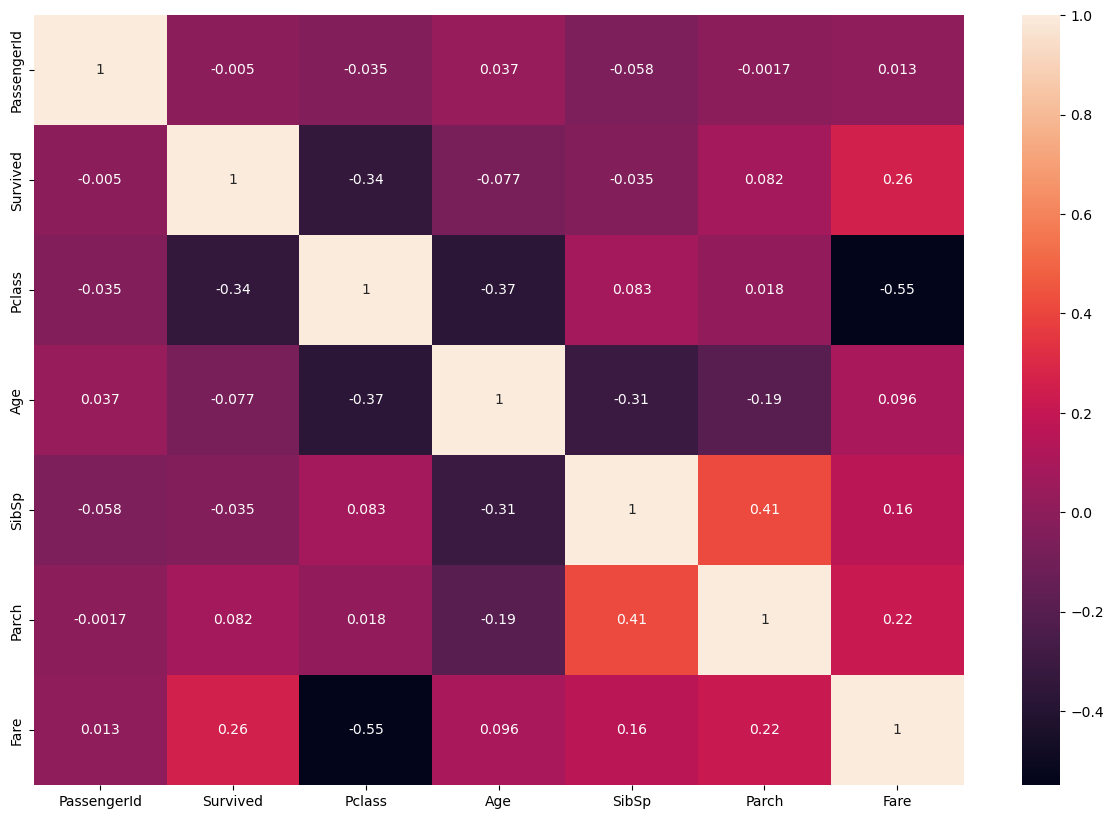

In [29]:
plt.figure(figsize = (15,10))

sns.heatmap(df.corr(method='pearson').drop(
  [], axis=1).drop([], axis=0),
            annot = True);
  
plt.show()


#en çok ilişki SibSp ile Parch arasındadır.
# en az ilişki fare ile Pclass arasındadır.

In [30]:
kolonlar=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

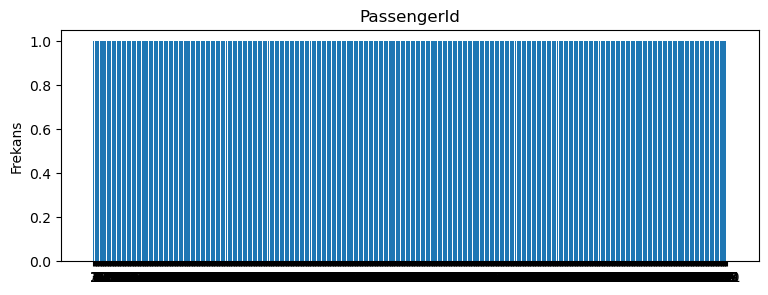

PassengerId: 
 1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


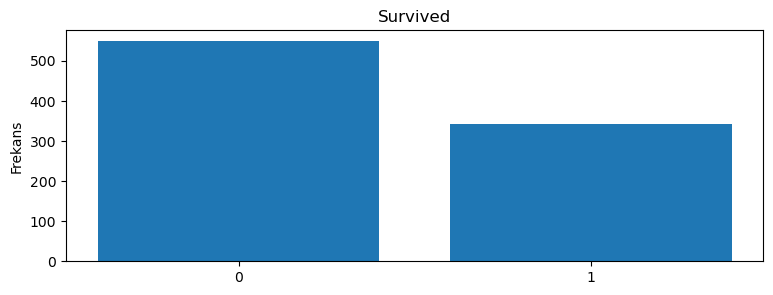

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


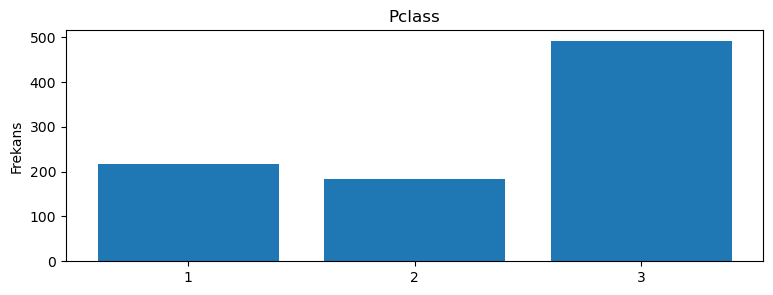

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


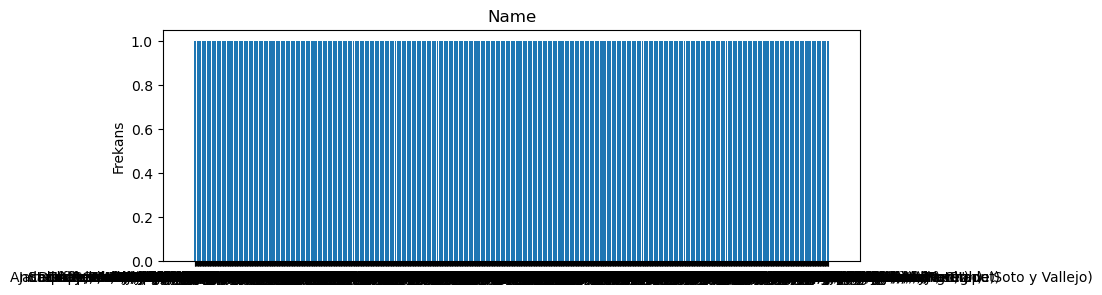

Name: 
 Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


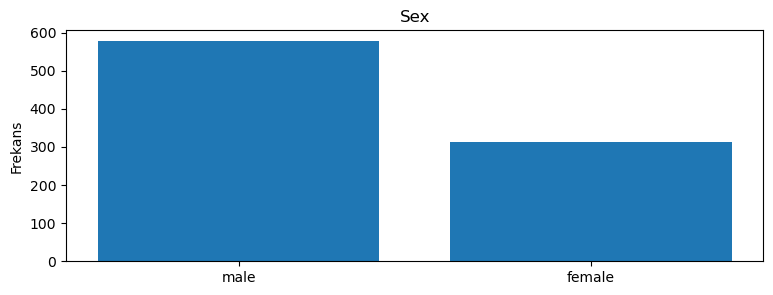

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


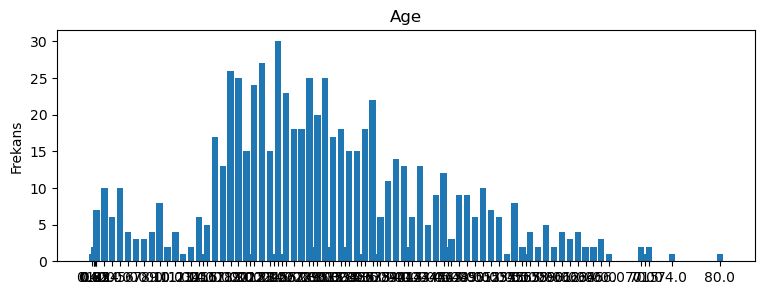

Age: 
 24.000    30
22.000    27
18.000    26
19.000    25
28.000    25
          ..
36.500     1
55.500     1
0.920      1
23.500     1
74.000     1
Name: Age, Length: 88, dtype: int64


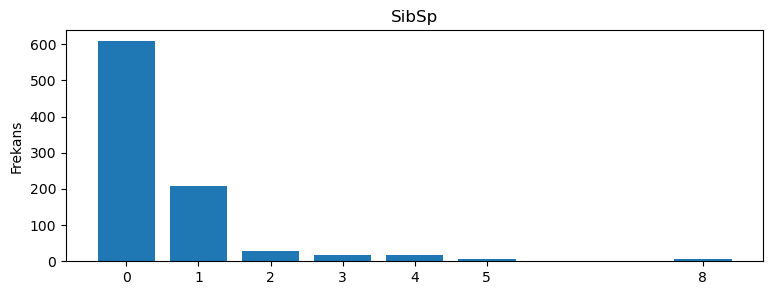

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


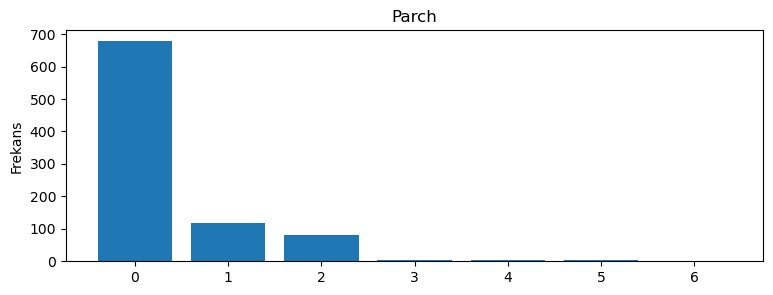

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


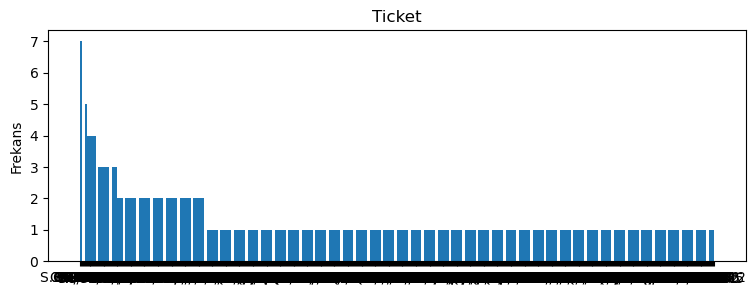

Ticket: 
 347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


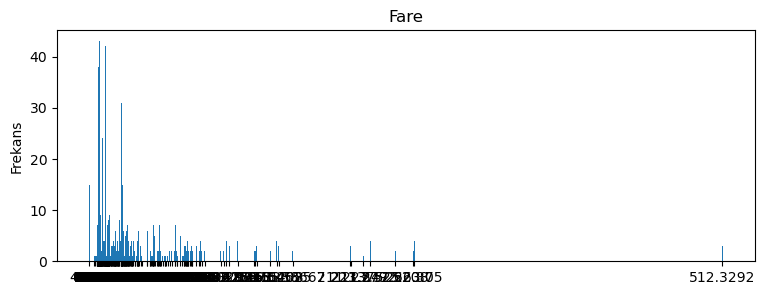

Fare: 
 8.050     43
13.000    42
7.896     38
7.750     34
26.000    31
          ..
35.000     1
28.500     1
6.237      1
14.000     1
10.517     1
Name: Fare, Length: 248, dtype: int64


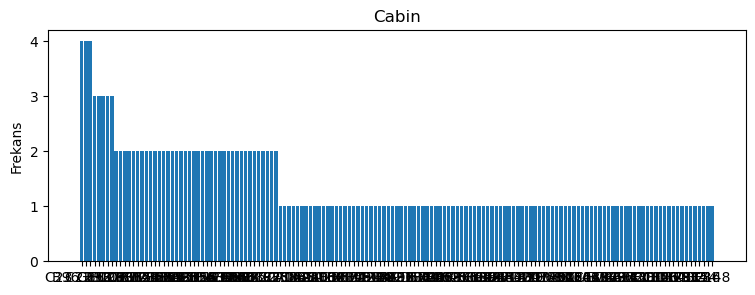

Cabin: 
 B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


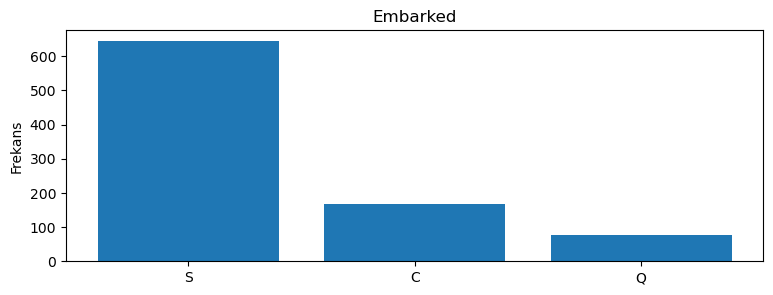

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [31]:
for i in kolonlar:
    bar_plot(i)
    

yukarıda for döngüsü ile kolonlarımın bar plotunu çizdirdim

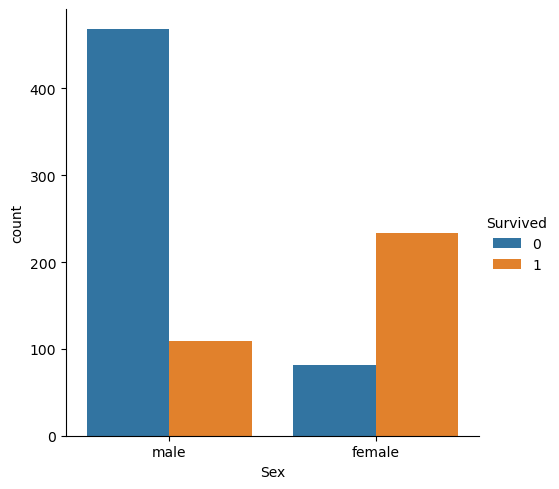

In [32]:
sns.catplot( data = df,x ="Sex", hue ="Survived", kind ="count")

bu fonksiyon sayesinde seaborn kütüphanesinde sex değişkeni için bar plot çizdirdim

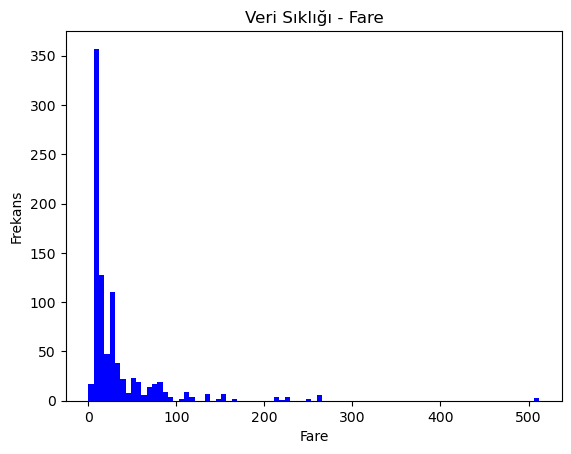

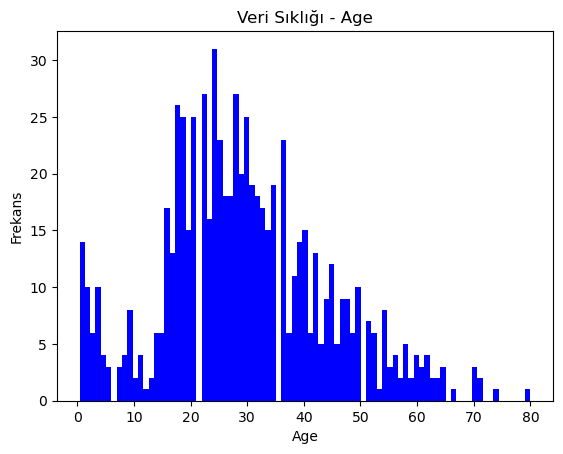

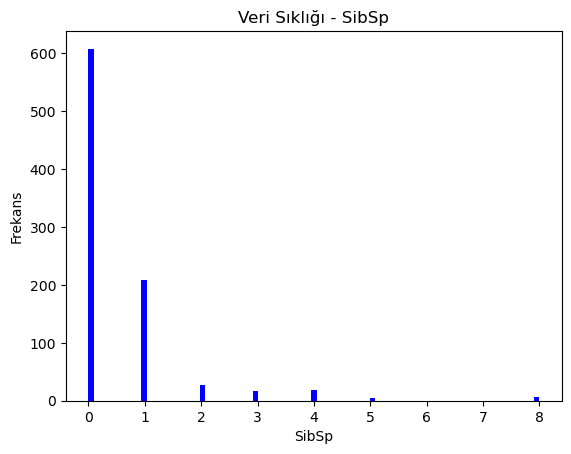

In [33]:
histogrif=["Fare", "Age","SibSp"]
for i in histogrif:
    plotHistogram(i)

Fare ,Age,SibSp değişkenleri için histogram grafiği çizdirdim.

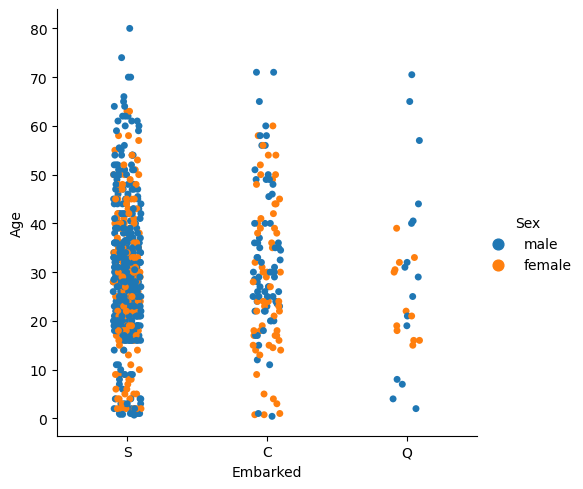

In [34]:
#Scatter Plot Grafiğini çizdiriyoruz.
sns.catplot(x="Embarked", y="Age", data =df, hue = "Sex");


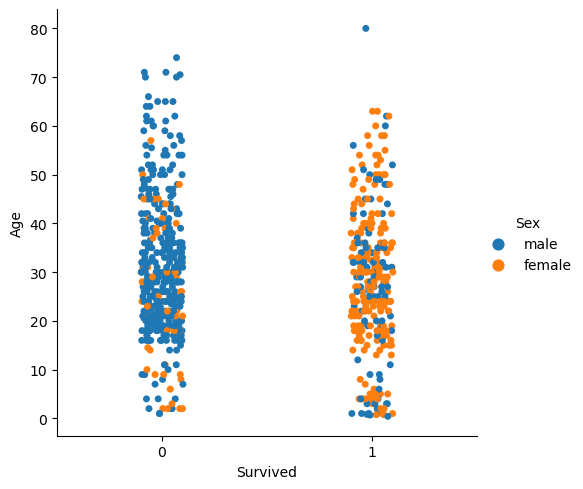

In [35]:
sns.catplot(x="Survived", y="Age", data =df, hue = "Sex");

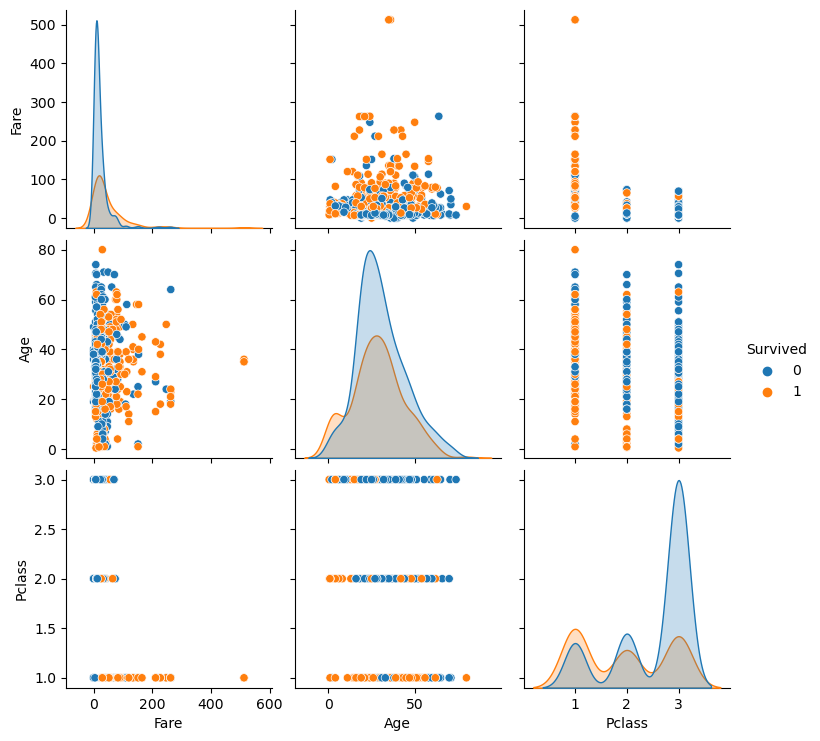

In [36]:
sns.pairplot(data=df[["Fare", "Survived", "Age", "Pclass"]], hue = "Survived", dropna = True);
#["Fare", "Survived", "Age", "Pclass"] değişkenlerinin  arasındaki bağlantıyı Survived değişkenine göre analiz ettim 

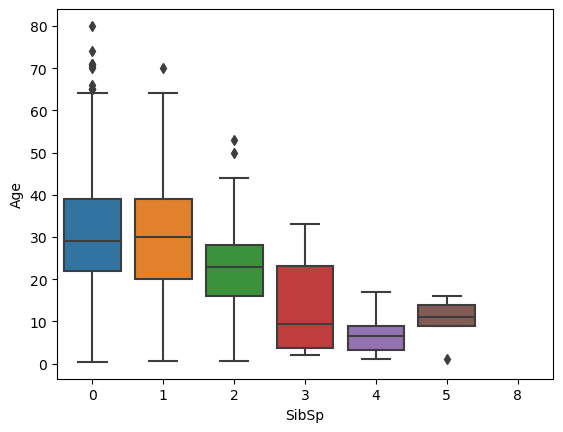

<Figure size 1000x1000 with 0 Axes>

In [37]:
graph("SibSp","Age",df)
#Değişkenlerinin box plot grafiğini çizdirdim.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

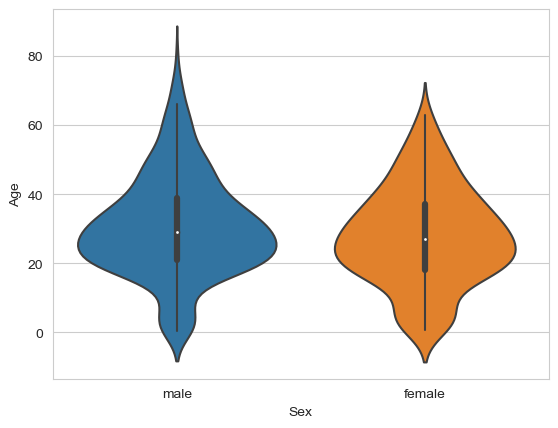

In [38]:
sbn.set_style('whitegrid')
sbn.violinplot(x = 'Sex', y = 'Age', data =df)

#Değişkenleri violin plot grafiğine göre çizdirdim.

OUTLİER THRESHOLDLARIN BELİRLENMESİ VE BUNA GÖRE AYKIRI DEĞER OLUP OLMADIĞININ KONTROLÜ 

In [39]:
outlier_thresholds(df,"Survived" , q1=0.05, q3=0.95)

(-1.5, 2.5)

In [40]:
check_outlier(df,"Survived" )

False

In [41]:
outlier_thresholds(df,"Pclass" , q1=0.05, q3=0.95)

(-2.0, 6.0)

In [42]:
check_outlier(df,"Pclass" )

False

In [43]:
outlier_thresholds(df,"Age" , q1=0.05, q3=0.95)

(-74.0, 134.0)

In [44]:
check_outlier(df,"Age" )

False

In [45]:
outlier_thresholds(df,"SibSp" , q1=0.05, q3=0.95)

(-4.5, 7.5)

In [46]:
check_outlier(df,"SibSp" )

True

In [47]:
outlier_thresholds(df,"Parch" , q1=0.05, q3=0.95)

(-3.0, 5.0)

In [48]:
check_outlier(df,"Parch" )

True

In [49]:
outlier_thresholds(df,"Fare" , q1=0.05, q3=0.95)

(-150.056225, 269.360375)

In [50]:
check_outlier(df,"Fare" )

True

outlier değerlere erişmek için  grab_outliers fonksiyonunu kullandım.


In [51]:
grab_outliers(df, "Fare", index=False)

     PassengerId  Survived  Pclass                                Name     Sex    Age  SibSp  Parch    Ticket    Fare        Cabin Embarked
258          259         1       1                    Ward, Miss. Anna  female 35.000      0      0  PC 17755 512.329          NaN        C
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez    male 36.000      0      1  PC 17755 512.329  B51 B53 B55        C
737          738         1       1              Lesurer, Mr. Gustave J    male 35.000      0      0  PC 17755 512.329         B101        C


In [52]:
grab_outliers(df, "Parch", index=False)

     PassengerId  Survived  Pclass                                     Name     Sex    Age  SibSp  Parch   Ticket   Fare Cabin Embarked
678          679         0       3  Goodwin, Mrs. Frederick (Augusta Tyler)  female 43.000      1      6  CA 2144 46.900   NaN        S


In [53]:
grab_outliers(df, "SibSp", index=False)

     PassengerId  Survived  Pclass                               Name     Sex  Age  SibSp  Parch    Ticket   Fare Cabin Embarked
159          160         0       3         Sage, Master. Thomas Henry    male  NaN      8      2  CA. 2343 69.550   NaN        S
180          181         0       3       Sage, Miss. Constance Gladys  female  NaN      8      2  CA. 2343 69.550   NaN        S
201          202         0       3                Sage, Mr. Frederick    male  NaN      8      2  CA. 2343 69.550   NaN        S
324          325         0       3           Sage, Mr. George John Jr    male  NaN      8      2  CA. 2343 69.550   NaN        S
792          793         0       3            Sage, Miss. Stella Anna  female  NaN      8      2  CA. 2343 69.550   NaN        S
846          847         0       3           Sage, Mr. Douglas Bullen    male  NaN      8      2  CA. 2343 69.550   NaN        S
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female  NaN      8      2 

In [54]:
df.drop("Name",axis=1, inplace=True)
# Name kolonunu etkisiz olduğu için sildim.

In [55]:
replace_with_thresholds(df, "Parch", q1=0.01, q3=0.99)

In [56]:
replace_with_thresholds(df, "SibSp", q1=0.01, q3=0.99)

In [57]:
replace_with_thresholds(df, "Fare", q1=0.01, q3=0.99)

In [58]:
df.shape

(891, 11)

In [59]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,female,38.000,0.000,0,113572,80.000,B28,NaN
829,830,1,1,female,62.000,0.000,0,113572,80.000,B28,NaN


In [60]:
df["Embarked"] = df["Embarked"].fillna('C')
#BU YÖNTEMLE NAN değerleri ortalama değer olduğu için  c sınıfına atadım

In [61]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [62]:
df.isnull().sum()
#Embarked değişkenindeki NaN değerler gitmiş mi diye genel bi kontrol için hepsine baktım.

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [63]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,male,NaN,0.000,0,330877,8.458,NaN,Q
17,18,1,2,male,NaN,0.000,0,244373,13.000,NaN,S
19,20,1,3,female,NaN,0.000,0,2649,7.225,NaN,C
26,27,0,3,male,NaN,0.000,0,2631,7.225,NaN,C
28,29,1,3,female,NaN,0.000,0,330959,7.879,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,NaN,0.000,0,2629,7.229,NaN,C
863,864,0,3,female,NaN,8.000,2,CA. 2343,69.550,NaN,S
868,869,0,3,male,NaN,0.000,0,345777,9.500,NaN,S
878,879,0,3,male,NaN,0.000,0,349217,7.896,NaN,S


In [64]:
 missing_values_table(df, na_name=False)
#Eksik Değerlerin Yakalanması için kullandığımız fonksiyon ile eksik değer var mı yok mu ona baktım

       n_miss  n_miss_ratio
Cabin     687        77.104
Age       177        19.865


In [65]:
missing_vs_target(df, "Survived")
#Eksik değerler ile Survived değişkeni arasındaki ilişkiyi inceledim

             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687




In [66]:
missing_cat_cols_fill(df, show_na_col_name=False)
#Kategorik değişkenleri mod ile doldurma işlemini  bu fonksiyon ile gerçekleştirdim.

Observations: 891
Variables: 11
cat_cols: 6
num_cols: 3
cat_but_car: 2
num_but_cat: 4


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.000,1.000,0,A/5 21171,7.250,NaN,S
1,2,1,1,female,38.000,1.000,0,PC 17599,71.283,C85,C
2,3,1,3,female,26.000,0.000,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,female,35.000,1.000,0,113803,53.100,C123,S
4,5,0,3,male,35.000,0.000,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000,0.000,0,211536,13.000,NaN,S
887,888,1,1,female,19.000,0.000,0,112053,30.000,B42,S
888,889,0,3,female,NaN,1.000,2,W./C. 6607,23.450,NaN,S
889,890,1,1,male,26.000,0.000,0,111369,30.000,C148,C


In [67]:
df["Age"].fillna(value=df["Age"].mean(),inplace=True)
## NaN değerleri yaşın ortalama değerine atadım

In [68]:
 missing_values_table(df, na_name=False)
#Eksik Değerler var mı diye tekrardan kontrol ettim.

       n_miss  n_miss_ratio
Cabin     687        77.104


In [69]:
df.corr()
#Korelasyon tablosunu çıkarttırdım.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000,-0.005,-0.035,0.033,-0.058,-0.002,0.013
Survived,-0.005,1.000,-0.338,-0.070,-0.035,0.082,0.257
Pclass,-0.035,-0.338,1.000,-0.331,0.083,0.018,-0.549
Age,0.033,-0.070,-0.331,1.000,-0.233,-0.179,0.092
SibSp,-0.058,-0.035,0.083,-0.233,1.000,0.415,0.160
Parch,-0.002,0.082,0.018,-0.179,0.415,1.000,0.216
Fare,0.013,0.257,-0.549,0.092,0.160,0.216,1.000


In [70]:
df.drop(['PassengerId','Ticket'],axis=1,inplace=True)
#etkileri olmadığı için PassengerId ve Ticket değişkenlerini çıkarttım.

In [71]:
missing_values_table(df, na_name=False) 
# Kayıp veri varmı diye kontrol ettim

       n_miss  n_miss_ratio
Cabin     687        77.104


In [72]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000,1.000,0,7.250,NaN,S
1,1,1,female,38.000,1.000,0,71.283,C85,C
2,1,3,female,26.000,0.000,0,7.925,NaN,S
3,1,1,female,35.000,1.000,0,53.100,C123,S
4,0,3,male,35.000,0.000,0,8.050,NaN,S


In [73]:
duplicate=df.duplicated()

In [74]:
duplicate.value_counts()
#107 adet eşsiz değer var.

False    784
True     107
dtype: int64

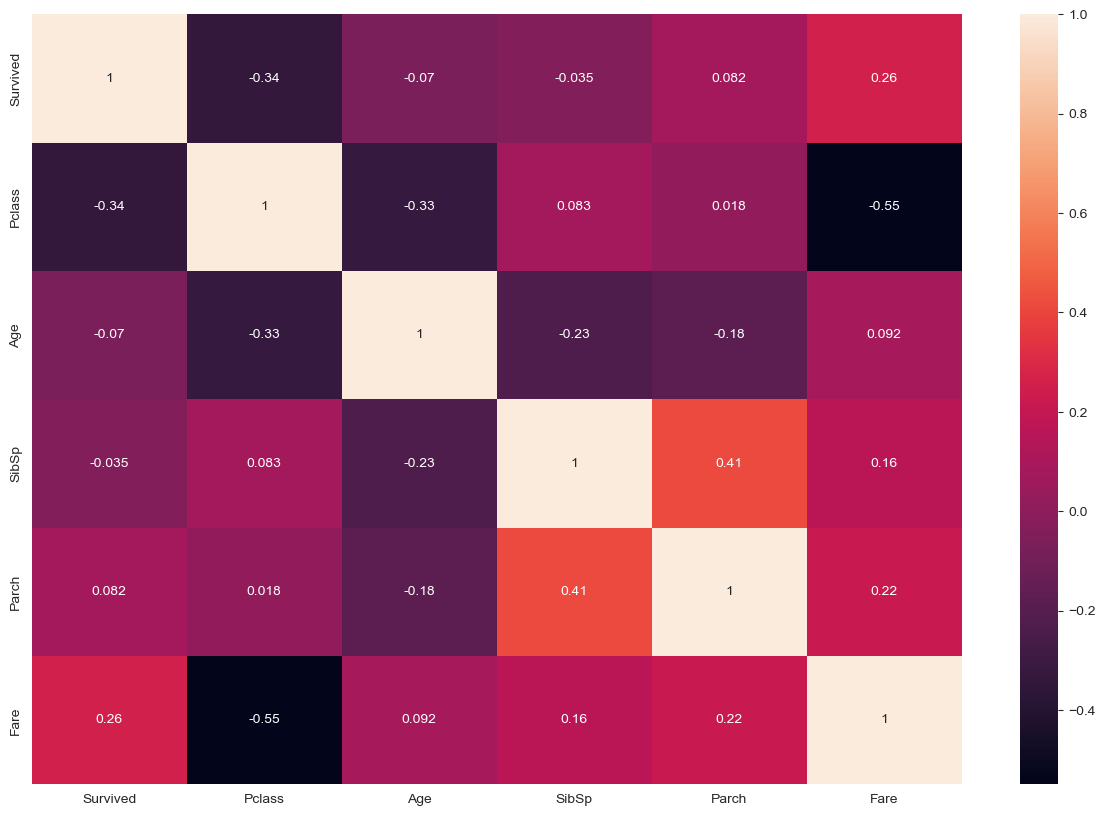

In [75]:
plt.figure(figsize = (15,10))

sns.heatmap(df.corr(method='pearson').drop(
  [], axis=1).drop([], axis=0),
            annot = True);
  
plt.show()


# en çok ilişki SibSp ile Parch arasındadır.
# en az ilişki fare ile Pclass arasındadır.

In [76]:
one_hot_encoder(df,"Embarked")
#Embarked Sütununun one hot kukla değişkenine göre değerlerini aldım.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Q,S
0,0,3,male,22.000,1.000,0,7.250,NaN,0,1
1,1,1,female,38.000,1.000,0,71.283,C85,0,0
2,1,3,female,26.000,0.000,0,7.925,NaN,0,1
3,1,1,female,35.000,1.000,0,53.100,C123,0,1
4,0,3,male,35.000,0.000,0,8.050,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000,0.000,0,13.000,NaN,0,1
887,1,1,female,19.000,0.000,0,30.000,B42,0,1
888,0,3,female,29.699,1.000,2,23.450,NaN,0,1
889,1,1,male,26.000,0.000,0,30.000,C148,0,0


In [77]:
one_hot_encoder(df,"Survived")
#Survived Sütununun one hot kukla değişkenine göre değerlerini aldım.

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,1
0,3,male,22.000,1.000,0,7.250,NaN,S,0
1,1,female,38.000,1.000,0,71.283,C85,C,1
2,3,female,26.000,0.000,0,7.925,NaN,S,1
3,1,female,35.000,1.000,0,53.100,C123,S,1
4,3,male,35.000,0.000,0,8.050,NaN,S,0
...,...,...,...,...,...,...,...,...,...
886,2,male,27.000,0.000,0,13.000,NaN,S,0
887,1,female,19.000,0.000,0,30.000,B42,S,1
888,3,female,29.699,1.000,2,23.450,NaN,S,0
889,1,male,26.000,0.000,0,30.000,C148,C,1


In [78]:
one_hot_encoder(df,"Sex")
#Sex Sütununun one hot kukla değişkenine göre değerlerini aldım.

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,male
0,0,3,22.000,1.000,0,7.250,NaN,S,1
1,1,1,38.000,1.000,0,71.283,C85,C,0
2,1,3,26.000,0.000,0,7.925,NaN,S,0
3,1,1,35.000,1.000,0,53.100,C123,S,0
4,0,3,35.000,0.000,0,8.050,NaN,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000,0.000,0,13.000,NaN,S,1
887,1,1,19.000,0.000,0,30.000,B42,S,0
888,0,3,29.699,1.000,2,23.450,NaN,S,0
889,1,1,26.000,0.000,0,30.000,C148,C,1


In [79]:
one_hot_encoder(df,"SibSp")
#Survived Sütununun one hot kukla değişkenine göre değerlerini aldım.

,Survived,Pclass,Sex,Age,Parch,Fare,Cabin,Embarked,1.0,2.0,3.0,4.0,5.0,8.0
0,0,3,male,22.000,0,7.250,NaN,S,1,0,0,0,0,0
1,1,1,female,38.000,0,71.283,C85,C,1,0,0,0,0,0
2,1,3,female,26.000,0,7.925,NaN,S,0,0,0,0,0,0
3,1,1,female,35.000,0,53.100,C123,S,1,0,0,0,0,0
4,0,3,male,35.000,0,8.050,NaN,S,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000,0,13.000,NaN,S,0,0,0,0,0,0
887,1,1,female,19.000,0,30.000,B42,S,0,0,0,0,0,0
888,0,3,female,29.699,2,23.450,NaN,S,1,0,0,0,0,0
889,1,1,male,26.000,0,30.000,C148,C,0,0,0,0,0,0


In [80]:
one_hot_encoder(df,"Parch")
#Parch Sütununun one hot kukla değişkenine göre değerlerini aldım.

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked,1,2,3,4,5,6
0,0,3,male,22.000,1.000,7.250,NaN,S,0,0,0,0,0,0
1,1,1,female,38.000,1.000,71.283,C85,C,0,0,0,0,0,0
2,1,3,female,26.000,0.000,7.925,NaN,S,0,0,0,0,0,0
3,1,1,female,35.000,1.000,53.100,C123,S,0,0,0,0,0,0
4,0,3,male,35.000,0.000,8.050,NaN,S,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000,0.000,13.000,NaN,S,0,0,0,0,0,0
887,1,1,female,19.000,0.000,30.000,B42,S,0,0,0,0,0,0
888,0,3,female,29.699,1.000,23.450,NaN,S,0,1,0,0,0,0
889,1,1,male,26.000,0.000,30.000,C148,C,0,0,0,0,0,0


In [81]:
binary_cols(df, "Sex")

['Survived']

In [82]:
label_encoder(df, "Sex",)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000,1.000,0,7.250,NaN,S
1,1,1,0,38.000,1.000,0,71.283,C85,C
2,1,3,0,26.000,0.000,0,7.925,NaN,S
3,1,1,0,35.000,1.000,0,53.100,C123,S
4,0,3,1,35.000,0.000,0,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000,0.000,0,13.000,NaN,S
887,1,1,0,19.000,0.000,0,30.000,B42,S
888,0,3,0,29.699,1.000,2,23.450,NaN,S
889,1,1,1,26.000,0.000,0,30.000,C148,C


In [83]:
label_encoder(df, "Embarked",)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000,1.000,0,7.250,NaN,2
1,1,1,0,38.000,1.000,0,71.283,C85,0
2,1,3,0,26.000,0.000,0,7.925,NaN,2
3,1,1,0,35.000,1.000,0,53.100,C123,2
4,0,3,1,35.000,0.000,0,8.050,NaN,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000,0.000,0,13.000,NaN,2
887,1,1,0,19.000,0.000,0,30.000,B42,2
888,0,3,0,29.699,1.000,2,23.450,NaN,2
889,1,1,1,26.000,0.000,0,30.000,C148,0


In [84]:
df.drop("Cabin",axis=1,inplace=True)
#Cabin sütununda çok fazla eksik değer  olduğu için çıkardım.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(3), int32(2), int64(3)
memory usage: 48.9 KB


In [86]:
df.head()
df.shape

(891, 8)

In [87]:
x=df.drop("Survived",axis=1)

y=df["Survived"]

In [88]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)
#Modelimizi test ve eğitim olmak üzere 2 parçaya bölüyoruz. 
# %80 eğitim %20 test

# karar agacı 

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier 
model_tree = DecisionTreeClassifier()
sc = StandardScaler()
sc.fit(x_train)
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)
model_tree.fit(x_train_scaled, y_train )
Y_pred=model_tree.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

Accuracy: 0.7873134328358209
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       165
           1       0.73      0.72      0.72       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



# KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier


In [91]:
knn_params={'n_neighbors':[5,7,9,11,13]}

knn=KNeighborsClassifier()

knn_cv_model=GridSearchCV(knn,knn_params,cv=10).fit(x_train_scaled,y_train)

print(knn_cv_model.best_params_)

{'n_neighbors': 11}


In [92]:
knn_final=KNeighborsClassifier(n_neighbors=11).fit(x_train_scaled,y_train)

In [93]:
knn_pred_test=knn_final.predict(x_test_scaled)
knn_pred_train=knn_final.predict(x_train_scaled)

print('Test sonucu',accuracy_score(y_test,knn_pred_test))
print('Eğitim sonucu',accuracy_score(y_train,knn_pred_train))



Test sonucu 0.8246268656716418
Eğitim sonucu 0.8330658105939005


# XGBOOST

In [94]:

from xgboost import XGBClassifier

In [95]:
xgb_model=XGBClassifier().fit(x_train,y_train)
y_pred=xgb_model.predict(x_test)
y_predict=xgb_model.predict(x_train)

print('test sonucu' ,accuracy_score(y_test, y_pred))
print('eğitim sonucu',accuracy_score(y_train, y_predict))


test sonucu 0.8208955223880597
eğitim sonucu 0.9759229534510433


In [96]:
xgb=XGBClassifier()

xgb_params={
        'n_estimators':[200,500,600],
        'subsample':[0.6,0.8],
        'min_split_loss':[1,2,3],
        'learning_rate':[0.1,0.01]
  
    
}
xgb_cv_model=GridSearchCV(xgb, xgb_params,cv=10).fit(x_train,y_train)
print(xgb_cv_model.best_params_)

{'learning_rate': 0.1, 'min_split_loss': 2, 'n_estimators': 600, 'subsample': 0.8}


In [97]:
xgb_final=XGBClassifier(learning_rate=0.1,min_split_loss=2,n_estimators=600,subsample=0.8,).fit(x_train,y_train)
y_pred=xgb_final.predict(x_test)
y_predict=xgb_final.predict(x_train)

print('test sonucu' ,accuracy_score(y_test, y_pred))
print('eğitim sonucu',accuracy_score(y_train, y_predict))


test sonucu 0.8544776119402985
eğitim sonucu 0.92776886035313
